In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [9]:
single_image = x_train[0]

In [11]:
single_image.shape

(28, 28)

In [13]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

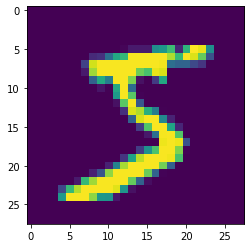

In [14]:
plt.imshow(single_image)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(60000,)

In [18]:
y_example = to_categorical(y_train)

In [19]:
y_example.shape

(60000, 10)

In [20]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [22]:
y_cat_train = to_categorical(y_train,10)

In [24]:
single_image.max()

255

In [25]:
single_image.min()

0

In [26]:
x_train = x_train/255

In [27]:
x_test = x_test/255

In [28]:
scaled_image = x_train[0]

In [29]:
scaled_image.max()

1.0

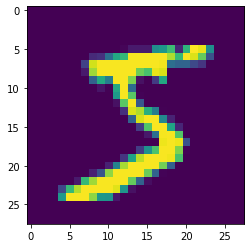

In [31]:
plt.imshow(scaled_image)

In [32]:
x_train.shape

(60000, 28, 28)

In [34]:
#batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [35]:
x_test = x_test.reshape(10000,28,28,1)

In [36]:
from tensorflow.keras.models import Sequential

In [37]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [39]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#OUTPUT LAYER SOFTMAX--> MULTI CLASS PROBLEM
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [42]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 582us/sample - loss: 0.1343 - accuracy: 0.9600 - val_loss: 0.0569 - val_accuracy: 0.9809
Epoch 2/10
60000/60000 [==============================] - 36s 594us/sample - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0417 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 29s 491us/sample - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0365 - val_accuracy: 0.9875
Epoch 4/10
60000/60000 [==============================] - 30s 504us/sample - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0503 - val_accuracy: 0.9860


In [43]:
metrics = pd.DataFrame(model.history.history)

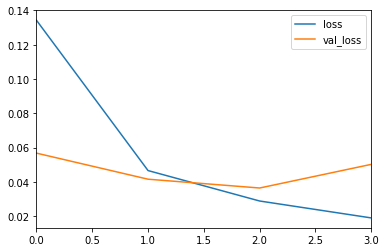

In [46]:
metrics[['loss','val_loss']].plot()

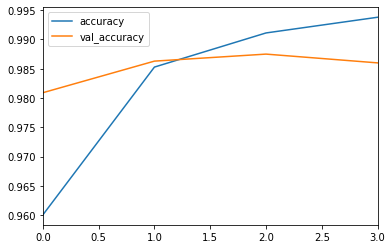

In [47]:
metrics[['accuracy','val_accuracy']].plot()

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.05031240719035559, 0.986]

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
predictions = model.predict_classes(x_test)

In [52]:
y_cat_test.shape

(10000, 10)

In [53]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [55]:
confusion_matrix(y_test,predictions)

array([[ 971,    1,    3,    0,    1,    0,    2,    0,    1,    1],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1, 1026,    0,    2,    0,    0,    2,    1,    0],
       [   0,    0,    2, 1007,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,  979,    0,    2,    0,    0,    1],
       [   1,    1,    0,   10,    0,  878,    2,    0,    0,    0],
       [   2,    4,    0,    0,    9,    2,  940,    0,    1,    0],
       [   0,    8,   10,    1,    1,    0,    0, 1007,    1,    0],
       [   4,    3,    4,    4,    5,    2,    3,    4,  942,    3],
       [   1,    4,    0,    2,   17,    3,    0,    6,    1,  975]],
      dtype=int64)

In [56]:
import seaborn as sns

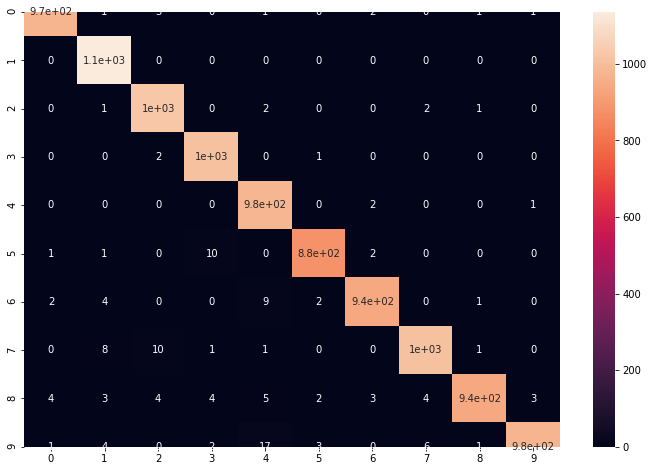

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [62]:
my_number = x_test[0]

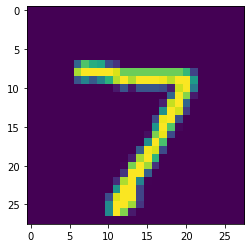

In [63]:
plt.imshow(my_number.reshape(28,28))

In [64]:
#number of images,width,height,color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)

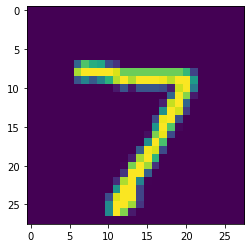

In [65]:
my_number2 = x_test[1]
plt.imshow(my_number.reshape(28,28))